# More Types of Expressions

In this notebook we will spend some time manipulating and analyzing text documents. Before we do that, let's introduce a few more types of expressions that might be useful.

## Dictionaries

Python dictionaries are similar to lists. List entries are indexed by their place in the list, but dictionary entries are indexed by keys. That is, Python dictionaries
associate *values* to *keys*. Let's start with an example.

In [1]:
d = {'cat': 17, 'dog': -15, 'turtle': 0}
# The keys are 'cat', 'dog', 'turtle'
# Their respective values are 17, -15, 0
d

{'cat': 17, 'dog': -15, 'turtle': 0}

You can look-up values associated to a given key.



In [2]:
d['dog']

-15

What happens if you try to access a missing key?



In [3]:
d = {'cat': 17, 'dog': -15, 'turtle': 0}
print(d['purple'])

KeyError: 'purple'

Contrast that with the result of using `get`.



In [4]:
d = {'cat': 17, 'dog': -15, 'turtle': 0}
print(d.get('cat'))
print(d.get('purple'))

17
None


Values can be reassigned.

In [5]:
d = {'cat': 17, 'dog': -15, 'turtle': 0, 'fish': 100}
print(d['cat'])
d['cat'] = 1000
print(d)

17
{'cat': 1000, 'dog': -15, 'turtle': 0, 'fish': 100}


Keys, along with associated values, can be removed.

In [6]:
del(d['fish'])
d

{'cat': 1000, 'dog': -15, 'turtle': 0}

They can also be added.

In [7]:
d['ferret']=900
d

{'cat': 1000, 'dog': -15, 'turtle': 0, 'ferret': 900}

### Creating Dictionaries

There are several methods for creating dictionaries. Let's look at a few of them by example.

In this first example, notice that the keys and the values are strings. Keys/values can be of virtually any Python expression type.

In [8]:
food_colors = {} # Start with an 'empty dictionary'
food_colors['apple'] = 'red' # Add keys and their values
food_colors['carrot'] = 'orange'
food_colors['lemon'] = 'yellow'

food_colors

{'apple': 'red', 'carrot': 'orange', 'lemon': 'yellow'}

We can iterate over keys in a dictionary.

In [9]:
for key in food_colors:
    print('The color of '+key+' is '+food_colors[key])    

The color of apple is red
The color of carrot is orange
The color of lemon is yellow


Here is another example of creating a dictionary. Note that the types of keys/values can be mixed.

In [10]:
L = [['cat','apple'],[100,'dog'],['a',9]] # Create a list of pairs

d = dict(L)
# The dict function uses the first entry in each pair of L as a key and the second as 
# the associated value.
d

{'cat': 'apple', 100: 'dog', 'a': 9}

Just like list comphrehension, there is dictionary comprehension.

In [12]:
fruits = ['apple', 'mango', 'banana','cherry']

word_lengths = {f:len(f) for f in fruits}

word_lengths

{'apple': 5, 'mango': 5, 'banana': 6, 'cherry': 6}

### Exercise

Experiment with dictionary creation to determine what types of objects are allowed as keys in a list and what types of objects are allowed as values. 

In particular:

1) Find one expression type which can't be used as a key.

2) Determine whether that object type can be used as a value.

3) Can keys be repeated? Can values be repeated?

### Exercise

Use a dictionary to make a "menu" containing five foods and their prices. Use your dictionary (and probably something like a `for` loop) to print out a readable menu.

### Some Other Dictionary Methods

Here are a few other things you can do with dictionaries which might prove useful (by no means an exhaustive list!). Let's define a list to test things on, then determine the purpose of each operation below.

In [16]:
animal_noises = {'cat':'meow','dog':'woof','cow':'moo'}

In [17]:
list(animal_noises.keys())
# What happens if we don't plug this into the list function?

['cat', 'dog', 'cow']

In [18]:
list(animal_noises.values())

['meow', 'woof', 'moo']

In [19]:
list(animal_noises.items())

[('cat', 'meow'), ('dog', 'woof'), ('cow', 'moo')]

We met `get` earlier, but there is more to `get`.  For instance, there
is a facility for including default values instead of `None`.



In [20]:
default = 'No such animal'
print(animal_noises.get('cat',default))
print(animal_noises.get('purple',default))

meow
No such animal


There is also `pop`.



In [21]:
print(animal_noises)
print(animal_noises.pop('cat'))
print(animal_noises)

{'cat': 'meow', 'dog': 'woof', 'cow': 'moo'}
meow
{'dog': 'woof', 'cow': 'moo'}


What if we want to combine two dictionaries?

In [22]:
animal_noises2 = {'bird':'squawk','fly':'buzz'} # Define another dictionary for testing.

In [23]:
animal_noises + animal_noises2

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

In [24]:
print(animal_noises,animal_noises2)
animal_noises.update(animal_noises2)
print(animal_noises)

{'dog': 'woof', 'cow': 'moo'} {'bird': 'squawk', 'fly': 'buzz'}
{'dog': 'woof', 'cow': 'moo', 'bird': 'squawk', 'fly': 'buzz'}


What happens if we combine dictionaries with some repeated keys?

In [25]:
# Experiment to figure it out!


## Sets

Sets are similar to lists, except they are unordered and can't contain duplicate entries (just like mathematical sets!). Standard set operations like intersection, union, etc. can be performed on set objects.

In [26]:
animals = ['cat','dog','cat','cow','cow']
animal_set = set(animals)

print(animals)
print(animal_set)

['cat', 'dog', 'cat', 'cow', 'cow']
{'cow', 'cat', 'dog'}


In [27]:
animal_set2 = set(['ferret','goat','cow','dog'])

S = animal_set.intersection(animal_set2)

print(animal_set2)
print(S)

{'goat', 'dog', 'cow', 'ferret'}
{'cow', 'dog'}


### Exercise

Try to guess the syntax to take the union of `animal_set` and `animal_set2`.

# Analysis of Movie Synopses

Now we will apply our Python skills to analyze a dataset of movie synopses from Wikipedia. We will use data that I borrowed from https://github.com/brandomr/document_cluster. It includes a list of 100 movie titles, together with their synopses from Wikipedia. 

## Importing and Cleaning the Data

The first step is to load the data. As usual, we have to clean the data (although these datasets were chosen because they are already pretty clean!)

In [189]:
#Upload the raw data for the movie titles
f = open('title_list.txt')
titles_raw_data = f.read()  
f.close()
print(titles_raw_data)
len(titles_raw_data)

The Godfather
The Shawshank Redemption
Schindler's List
Raging Bull
Casablanca
One Flew Over the Cuckoo's Nest
Gone with the Wind
Citizen Kane
The Wizard of Oz
Titanic
Lawrence of Arabia
The Godfather: Part II
Psycho
Sunset Blvd.
Vertigo
On the Waterfront
Forrest Gump
The Sound of Music
West Side Story
Star Wars
E.T. the Extra-Terrestrial
2001: A Space Odyssey
The Silence of the Lambs
Chinatown
The Bridge on the River Kwai
Singin' in the Rain
It's a Wonderful Life
Some Like It Hot
12 Angry Men
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Amadeus
Apocalypse Now
Gandhi
The Lord of the Rings: The Return of the King
Gladiator
From Here to Eternity
Saving Private Ryan
Unforgiven
Raiders of the Lost Ark
Rocky
A Streetcar Named Desire
The Philadelphia Story
To Kill a Mockingbird
An American in Paris
The Best Years of Our Lives
My Fair Lady
Ben-Hur
Doctor Zhivago
Patton
Jaws
Braveheart
The Good, the Bad and the Ugly
Butch Cassidy and the Sundance Kid
The Treasure of the

1738

The titles data is one long string. It looks like we should split over new lines.

In [190]:
titles = titles_raw_data.split('\n')
len(titles)

101

There are only 100 movie titles. The last line is blank, hence the 101 length. Let's slice off the last entry.

In [191]:
titles = titles[:-1]
len(titles)

100

Finally we load the synopses.

In [192]:
f = open('synopses_list_wiki.txt')
synopses_raw_data = f.read()  
f.close()
print(len(synopses_raw_data))

984976


Once again, the data is loaded as a single long string. Let's take a look at it to see how we should split it up.

In [193]:
synopses_raw_data[:100000]

' Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson 

Looks like the different synopses are separated by 'BREAKS HERE'.

In [194]:
synopses_list = synopses_raw_data.split('BREAKS HERE')
len(synopses)

100

Once again there is an extra entry.

In [195]:
synopses_list = synopses_list[:-1]

Let's take a look at the synopsis for the first movie (The Godfather).

In [196]:
synopses_list[0]

' Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson 

There is an annoying preamble which must come from Wikipedia, which should really be cut off. I'll do something hacky: copy and paste the offensive text, get its length, then just slice off the start of each synopsis by that length (there is probably a more elegant solution here...).

In [197]:
synopses = [x[len(' Plot  [edit]  [  [  edit  edit  ]  ]  \n  '):] for x in synopses_list]
#synopses = list(map(lambda x:x[42:],synopses))

In [198]:
# Check that the solution worked by looking at a few examples
synopses[1]

'In 1947, banker Andy Dufresne is convicted of murdering his wife and her lover and sentenced to two consecutive life sentences at the fictional Shawshank State Penitentiary in the state of Maine. Andy befriends contraband smuggler Ellis "Red" Redding, an inmate serving a life sentence. Red procures a rock hammer and later a large poster of Rita Hayworth for Andy. Working in the prison laundry, Andy is regularly assaulted by the "bull queer" gang "the Sisters" and their leader, Bogs.  In 1947, banker Andy Dufresne is convicted of murdering his wife and her lover and sentenced to two consecutive life sentences at the fictional Shawshank State Penitentiary in the state of Maine. Andy befriends   contraband  contraband   smuggler Ellis "Red" Redding, an inmate serving a life sentence. Red procures a   rock hammer  rock hammer   and later a large poster of   Rita Hayworth  Rita Hayworth   for Andy. Working in the prison laundry, Andy is regularly assaulted by the "  bull queer  bull queer 

### Tokenizing and Removing Stop Words

Now our goal is to compare the movie synopses. Of course, any block of natural language text will contain many instances of common words like 'the', 'an', etc. As the next preprocessing step, we would like to turn each synopsis into a list of words with these common words (called "stop words") removed.

We'll use a package called `nltk` (Natural Language Tool Kit) The `nltk` has a list of stop words built in, which may take a second to download.

In [199]:
import nltk # Import nltk
# Import and download stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
# Import the 'word_tokenize' function
from nltk.tokenize import word_tokenize
# The following is used in the tokenize function
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/Tom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Tom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [200]:
# Store the stopwords in a list and take a look at them
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Now the plan is to split each synopsis into a list of words, then remove all stop words. We will use the `word_tokenize` function from `nltk`.

We could also just use `.split(' ')`. The benefit here is that `word_tokenize` will also split off punctuation into its own entry, which will make our lives a bit easier.

In [201]:
example = synopses[0]

word_tokens = word_tokenize(example)

word_tokens[:20]

['On',
 'the',
 'day',
 'of',
 'his',
 'only',
 'daughter',
 "'s",
 'wedding',
 ',',
 'Vito',
 'Corleone',
 'hears',
 'requests',
 'in',
 'his',
 'role',
 'as',
 'the',
 'Godfather']

### Exercise

We see that `','` appears as a word in the list. We would like to remove punctuation from this list. Define a new list called `word_tokens2` where all entries of the above list containing only punctuation are removed. I've helped you out by creating a list of stuff that we want to remove.

In [240]:
# Define the list of extra stuff to remove
punctuation = ['.',',',';',':',"'s",' ',"' '","'","``","''",'(',')',"'re",'!','?','_','...','$','[',']']

# Define the word_tokens2 list below.

# Once it is defined, take a look at the result to make sure it worked.

Note that the `stopwords` set only contains words in all lower case. We can transfer each word in `word_tokens` into lower case using the `.lower()` function.

In [241]:
word_tokens3 = list(map(lambda x:x.lower(),word_tokens2))

word_tokens3[:20]

['on',
 'the',
 'day',
 'of',
 'his',
 'only',
 'daughter',
 'wedding',
 'vito',
 'corleone',
 'hears',
 'requests',
 'in',
 'his',
 'role',
 'as',
 'the',
 'godfather',
 'the',
 'don']

Almost there! Now we can remove the stop words.

In [242]:
#word_tokens4 = list(filter(lambda x: x not in stop_words,word_tokens3))
word_tokens4 = [x for x in word_tokens3 if x not in stop_words]

word_tokens4[:20]

['day',
 'daughter',
 'wedding',
 'vito',
 'corleone',
 'hears',
 'requests',
 'role',
 'godfather',
 'new',
 'york',
 'crime',
 'family',
 'vito',
 'youngest',
 'son',
 'michael',
 'marine',
 'corps',
 'uniform']

It looks like we have obtained the desired result. Now we can define a function to automate the above procedure.

In [243]:
def synopsis_filter(synopsis):
    # Get the initial list of word tokens
    word_tokens = word_tokenize(synopsis)
    # Remove punctuation. No need to keep making new variables, we can just update the old one.
    word_tokens = [x for x in word_tokens if x not in punctuation]
    # Transform words to lower case
    word_tokens = [x.lower() for x in word_tokens]
    # Remove stop words
    word_tokens = [x for x in word_tokens if x not in stop_words]
    return word_tokens

In [244]:
# Test on a couple of examples to make sure it works
synopsis_filter(synopses[1])[:20]

['1947',
 'banker',
 'andy',
 'dufresne',
 'convicted',
 'murdering',
 'wife',
 'lover',
 'sentenced',
 'two',
 'consecutive',
 'life',
 'sentences',
 'fictional',
 'shawshank',
 'state',
 'penitentiary',
 'state',
 'maine',
 'andy']

Applying `synopsis_filter` to our list of synopses produces a nice data set with only the interesting words from each synopsis.

In [245]:
filtered_synopses = list(map(synopsis_filter,synopses))

In [208]:
# Look at a couple of examples to make sure our data looks good
filtered_synopses[3][:20]

['brief',
 'scene',
 '1964',
 'aging',
 'overweight',
 'italian',
 'american',
 'jake',
 'lamotta',
 'robert',
 'de',
 'niro',
 'practices',
 'comedy',
 'routine',
 'rest',
 'film',
 'occurs',
 'flashback',
 '1941']

## Common Words Between Synopses

One way that we could understand similarity between synopses would be to count the number of common words between them. This is easily accomplished by using set objects and taking intersections.

To start, let's compare all synopses to the synopsis for The Godfather.

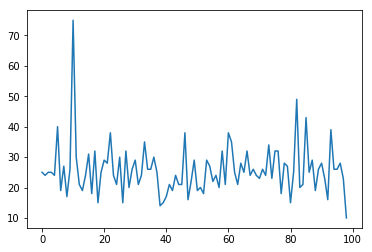

In [209]:
# Define the Godfather word set
Godfather_word_set = set(filtered_synopses[0])

# For every other synopsis, find its word set, intersect it with the word set for The Godfather
# then compute the magnitude of the result.
same_words_count = [len(set(synopsis).intersection(Godfather_word_set)) for synopsis in filtered_synopses]

# We can now plot these similar word counts.
import matplotlib.pyplot as plt

plt.plot(similar_words[1:])
# Plot starting at index 1.
# Godfather has all words in common with itself, so if we plot from index 0 the graph is not very informative.

We see that there are couple of outliers here. Let's check the titles.

In [210]:
# We can find the locations of these outliers using the argmax and argmin functions from numpy
import numpy as np
most_similar = np.argmax(similar_words[1:])
least_similar = np.argmin(similar_words)

print('The most similar movie to The Godfather is '+titles[most_similar+1])
# We need to reshift the 'most similar' result because we indexed it differently in our calculation.
print('The least similar movie to The Godfather is '+titles[least_similar])

The most similar movie to The Godfather is The Godfather: Part II
The least similar movie to The Godfather is Yankee Doodle Dandy


Now that we've done this for a single movie, we can compare all pairs of movies. We just have to run the above computation for each movie.

In [211]:
movie_similarities = []
for j in range(100):
    word_set = set(filtered_synopses[j])
    same_words_count = [len(set(synopsis).intersection(word_set)) for synopsis in filtered_synopses]
    movie_similarities.append(same_words_count)

In [212]:
# Check that the lists make sense
movie_similarities[2][:10]

[24, 22, 296, 29, 35, 34, 40, 18, 33, 16]

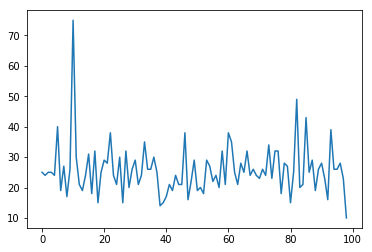

In [213]:
# Check that this agrees with our previous work by plotting
plt.plot(movie_similarities[0][1:])

We can then define a list where the $k$th index gives the index of the movie which is least similar to $k$.

In [214]:
least_similar_movies = [np.argmin(movie_similarities[k]) for k in range(100)]
least_similar_movies

[99,
 99,
 99,
 99,
 99,
 99,
 99,
 38,
 40,
 15,
 99,
 99,
 99,
 99,
 99,
 9,
 15,
 39,
 99,
 15,
 69,
 40,
 36,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 89,
 99,
 40,
 41,
 9,
 99,
 22,
 99,
 99,
 19,
 48,
 15,
 48,
 15,
 14,
 89,
 53,
 99,
 40,
 66,
 85,
 14,
 99,
 99,
 89,
 99,
 89,
 41,
 14,
 99,
 48,
 99,
 99,
 99,
 14,
 95,
 49,
 89,
 48,
 99,
 99,
 48,
 48,
 99,
 48,
 99,
 41,
 89,
 99,
 99,
 99,
 40,
 89,
 89,
 99,
 89,
 48,
 14,
 99,
 99,
 99,
 99,
 27,
 89,
 99,
 65,
 99,
 99,
 99,
 79]

Hmmm... Looks like Yankee Doodle Dandy has a synopsis which is least similar to lots of movies. We might want to run that again, but exclude Yankee Doodle Dandy.

In [215]:
least_similar_movies = [np.argmin(movie_similarities[k][:99]) for k in range(100)]
least_similar_movies

[39,
 48,
 60,
 19,
 41,
 89,
 48,
 38,
 40,
 15,
 60,
 41,
 48,
 89,
 48,
 9,
 15,
 39,
 64,
 15,
 69,
 40,
 36,
 27,
 41,
 46,
 15,
 48,
 60,
 15,
 89,
 70,
 40,
 41,
 9,
 19,
 22,
 41,
 41,
 19,
 48,
 15,
 48,
 15,
 14,
 89,
 53,
 39,
 40,
 66,
 85,
 14,
 60,
 46,
 89,
 41,
 89,
 41,
 14,
 48,
 48,
 89,
 14,
 41,
 14,
 95,
 49,
 89,
 48,
 20,
 31,
 48,
 48,
 48,
 48,
 53,
 41,
 89,
 46,
 48,
 9,
 40,
 89,
 89,
 15,
 89,
 48,
 14,
 60,
 56,
 89,
 15,
 27,
 89,
 89,
 65,
 89,
 41,
 40,
 79]

We can now create a dictionary with a key for each film and the values given by least similar movies. This will be a lot easier to read.

In [216]:
least_similar_dict = {}

for j in range(100):
    least_similar_dict[titles[j]] = titles[least_similar_movies[j]]

In [217]:
least_similar_dict

{'The Godfather': 'Rocky',
 'The Shawshank Redemption': 'Patton',
 "Schindler's List": 'The Exorcist',
 'Raging Bull': 'Star Wars',
 'Casablanca': 'The Philadelphia Story',
 "One Flew Over the Cuckoo's Nest": 'Mutiny on the Bounty',
 'Gone with the Wind': 'Patton',
 'Citizen Kane': 'Raiders of the Lost Ark',
 'The Wizard of Oz': 'A Streetcar Named Desire',
 'Titanic': 'On the Waterfront',
 'Lawrence of Arabia': 'The Exorcist',
 'The Godfather: Part II': 'The Philadelphia Story',
 'Psycho': 'Patton',
 'Sunset Blvd.': 'Mutiny on the Bounty',
 'Vertigo': 'Patton',
 'On the Waterfront': 'Titanic',
 'Forrest Gump': 'On the Waterfront',
 'The Sound of Music': 'Rocky',
 'West Side Story': 'City Lights',
 'Star Wars': 'On the Waterfront',
 'E.T. the Extra-Terrestrial': 'Mr. Smith Goes to Washington',
 '2001: A Space Odyssey': 'A Streetcar Named Desire',
 'The Silence of the Lambs': 'Saving Private Ryan',
 'Chinatown': 'Some Like It Hot',
 'The Bridge on the River Kwai': 'The Philadelphia Story

### Exercise

Create a list `most_similar_movies` such that the $k$th entry gives the index of the movie synopsis which is *most* similar to the $k$th movie's. 

Of course, each synopsis is most similar to itself. This means that the $k$th entry should be the movie synopsis which is most similar to the $k$th movie's *excluding the $k$th movie itself*.

Also define a dictionary called `most_similar_dict` in analogy with `least_similar_dict`.

### Homework

The most similar movies list seems to be dominated by The Deer Hunter, All Quiet on the Western Front and Nashville. It might be interesting to remove these movies as options and rerun the 'most similar' computation. Give this a try. You may have to be creative, and you should definitely check that you are getting indexing correct!

## Similarity by Word Counts

Counting common words gives some interesting results, but there are many other ways we could try to measure similarity between texts.

Let's try another method to measure similarity. We will first create a list containing all unique words which appear in all 100 synopses.

In [219]:
# The first computation creates one big list out of synopses (a list of lists)
flat_word_list = [word for synopsis in filtered_synopses for word in synopsis]

# Now we want to remove repeat words. 
word_list_no_repeats = list(set(flat_word_list)) # A set object doesn't allow repeated entries

Out of curiosity, let's look at how much was removed by trimming our list to unique words.

In [220]:
len(flat_word_list), len(word_list_no_repeats)

(94228, 10823)

Now we can count the number of occurences of each word in each of the synopses to get a word vector.

In [221]:
word_vectors = []

for j in range(len(filtered_synopses)):
    vec = []
    synopsis = filtered_synopses[j] 
    for k in range(len(word_list_no_repeats)):
        vec.append(synopsis.count(word_list_no_repeats[k]))
    word_vectors.append(vec)

Each word vector is a vector in $\mathbb{R}^{10902}$. Since the synopses vary quite a lot in length, it might be useful to turn our word vectors into unit vectors. The result gives a collection of 100 points on the $10901$-dimensional unit sphere!

In [259]:
import numpy as np
normalized_word_vectors = [x/np.linalg.norm(x) for x in word_vectors]

Let's define a function to measure the angle between unit vectors. If we think of each unit vector as a point on the unit sphere, then the angle between the vectors gives a measure of distance between the points (i.e., the angle function is a *metric* on the sphere, called *geodesic distance*).

In [260]:
def angle(u,v):
    uu = u/np.linalg.norm(u)
    vv = v/np.linalg.norm(v)
    if np.dot(uu,vv) > 0.999999: # Guard against numerical errors with the arccos function
        return 0
    else:
        return np.arccos(np.dot(uu,vv))

In [261]:
# Test; the output should be pi/2 ~ 1.57
u = np.array([1,0,0])
v = np.array([0,1,0])
angle(u,v)

1.5707963267948966

In [262]:
# Test; the output should be 0 
angle(normalized_word_vectors[0],normalized_word_vectors[0])

0

Let's take a look at the angle between The Godfather and every other movie.

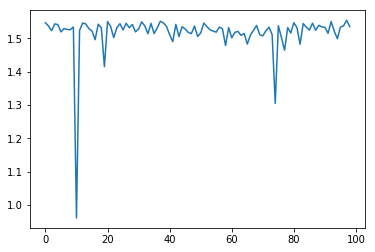

In [266]:
angles_to_godfather = [angle(normalized_word_vectors[0],x) for x in normalized_word_vectors]

plt.plot(angles_to_godfather[1:])
# Once again, start plotting at 1 to get a better looking plot

We see that almost everything is at around $\pi/2$. This is actually not surprising if you are familiar with the peculiarities of high-dimensional geometry (see, e.g., https://en.wikipedia.org/wiki/Concentration_of_measure). 

The angles less than, say, $1.5$ really stand out here. Let's see which movies they are.

In [264]:
# Create a list of indices for movies which are close to Godfather
L = [idx for idx in range(len(angles_to_godfather)) if angles_to_godfather[idx] < 1.5]

# Print the titles
for j in range(len(L)):
    print(titles[L[j]])

The Godfather
The Godfather: Part II
The Sound of Music
E.T. the Extra-Terrestrial
To Kill a Mockingbird
Goodfellas
It Happened One Night
Tootsie
The Grapes of Wrath
Nashville
Rebel Without a Cause


### Exercise

Create dictionaries listing most and least similar movies (as we did above), using the word frequency vectors. Do the results look any different than what we got above?

# Homework

There is another file in the data folder which lists all of the genre classifications for the movies. Try to use these methods to classify movie genres. Here is one possible scheme:

For each movie, find the (say) 5 most similar movies via one of the methods above. Does the query movie share a genre classification with any of its 5 "nearest neighbors"? Out of the 100 movies in the list, how often do we get a successful classification? 

# Homework

There are many other methods that can be used to compare text. A standard method, which is pretty close to our last approach, is to create vectors using *term frequency - inverse document frequency* scores. You can read about them here: https://en.wikipedia.org/wiki/Tf–idf. Try running through the experiments we did above using TF-IDF instead. Do you get any interesting results?

# Homework

Read up on Zipf's Law: https://en.wikipedia.org/wiki/Zipf%27s_law. Do the words in all of these Wikipedia articles follow Zipf's Law? To determine the answer, you will want to find the number of times that each word appears across all of the synopses; you might try Googling around to find an efficient way to perform a task like that (or you can always try to figure it out yourself!).

# Big (Vague) Homework

Start working your own coding project! After this week, you have seen most of the basics of Python---certainly enough to start working on something interesting. I highly recommend working on something that is related to your research, or working on analyzing some data set you personally find interesting. Having a running project is the best way to develop your programming skills!